# Analysis of MAFSA Results

As always, let's start by importing the relevant packages in Python:

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

We can then load our comma-separated statistics file that was based on 100 random samplings of the reverse-sorted file:

In [5]:
data = np.loadtxt('../data/stats.txt', delimiter=',')
num_strings = data[:,0]
num_states = data[:,1]
num_bytes = data[:,2]
num_edges = data[:,3]

First, let's see if we can get a rough sense of how many bytes we've read for a given number of strings:

<IPython.core.display.Javascript object>


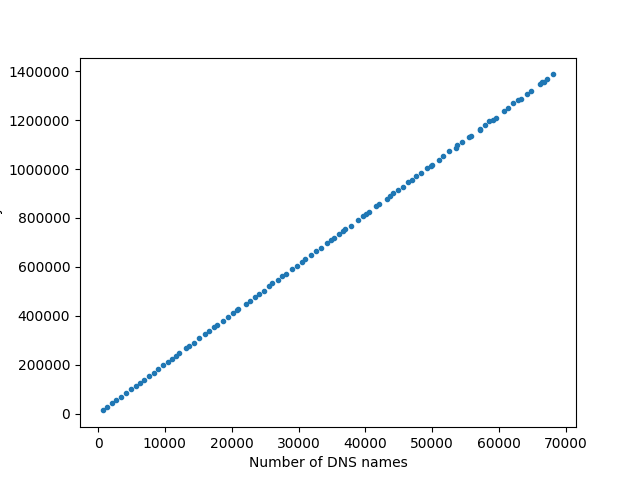

Approximate bytes per name: 20.367610670620145 (R = 0.9999926108115872)
Other stats:
  intercept: -210.27134672738612
  p_value: 4.307813847055604e-236
  std_err: 0.007950052425972735


In [22]:
bytes_vs_strings = plt.figure()
bytes_vs_strings_ax = bytes_vs_strings.add_subplot(111)
bytes_vs_strings_ax.plot(num_strings, num_bytes, '.')
bytes_vs_strings_ax.set_xlabel('Number of DNS names')
bytes_vs_strings_ax.set_ylabel('Number of bytes')
slope, intercept, r_value, p_value, std_err = stats.linregress(num_strings, num_bytes)
print('Approximate bytes per name: {} (R = {})'.format(slope, r_value))
print('Other stats:')
print('  intercept: {}'.format(intercept))
print('  p_value: {}'.format(p_value))
print('  std_err: {}'.format(std_err))

So that seems like a pretty clear-cut linear fit, with each name being around 20 characters long.

<IPython.core.display.Javascript object>


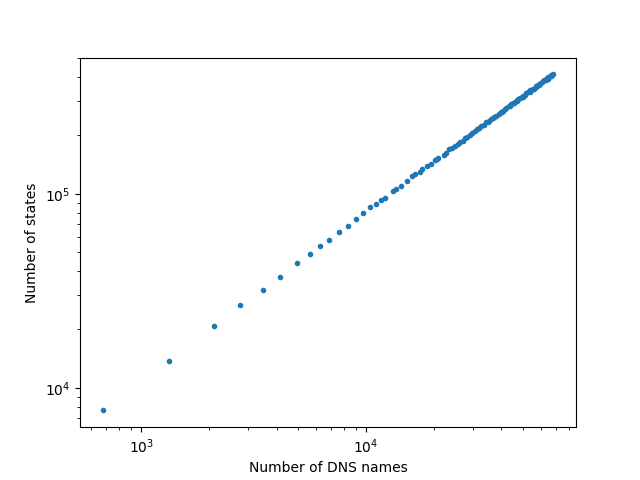

In [29]:
states_vs_strings = plt.figure()
states_vs_strings_ax = states_vs_strings.add_subplot(111)
states_vs_strings_ax.plot(num_strings, num_states, '.')
states_vs_strings_ax.set_xlabel('Number of DNS names')
states_vs_strings_ax.set_ylabel('Number of states')
states_vs_strings_ax.set_xscale('log')

<IPython.core.display.Javascript object>


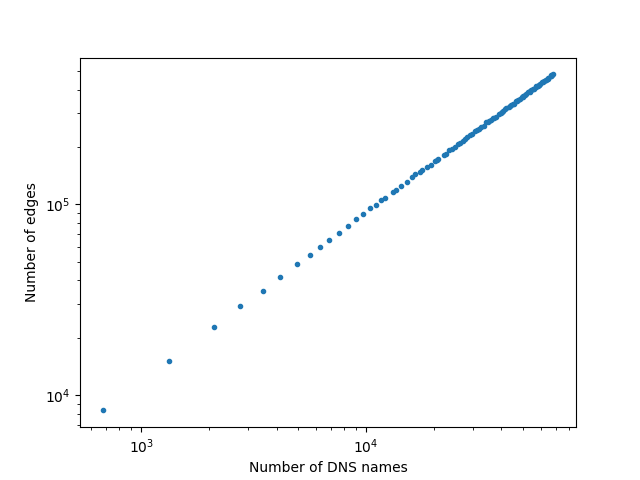

LinregressResult(slope=0.87513003802494216, intercept=3.3524981166808097, rvalue=0.99994751192086317, pvalue=8.5075045171921458e-195, stderr=0.00091043544711330636)
LinregressResult(slope=0.85878548659323739, intercept=3.3847356573570906, rvalue=0.99991515383812712, pvalue=1.109670304845536e-184, stderr=0.0011359456822573331)
LinregressResult(slope=0.87497788672478838, intercept=0.71731148200328576, rvalue=0.99995765758635857, pvalue=2.5443618366703394e-199, stderr=0.00081757538082043277)
LinregressResult(slope=0.85863755778772077, intercept=0.79874744708315859, rvalue=0.99992690719691213, pvalue=8.0273080270921892e-188, stderr=0.0010541444566203215)


In [28]:
edges_vs_strings = plt.figure()
edges_vs_strings_ax = edges_vs_strings.add_subplot(111)
edges_vs_strings_ax.plot(num_strings, num_edges, '.')
edges_vs_strings_ax.set_xlabel('Number of DNS names')
edges_vs_strings_ax.set_ylabel('Number of edges')
edges_vs_strings_ax.set_xscale('log')
edges_vs_strings_ax.set_yscale('log')
print(stats.linregress(np.log(num_strings), np.log(num_edges)))
print(stats.linregress(np.log(num_strings), np.log(num_states)))
print(stats.linregress(np.log(num_bytes), np.log(num_edges)))
print(stats.linregress(np.log(num_bytes), np.log(num_states)))

<IPython.core.display.Javascript object>


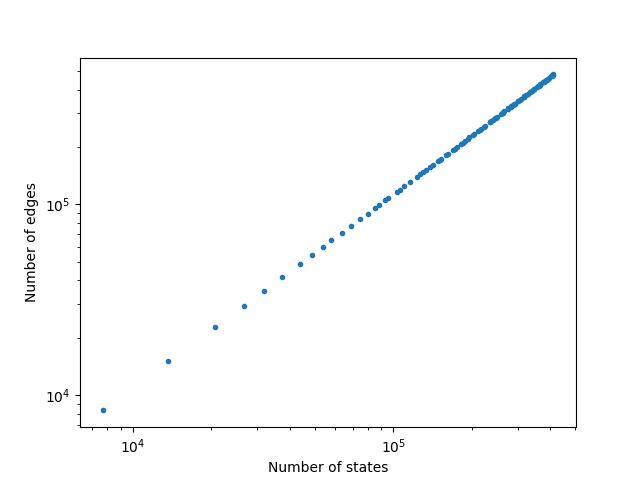

LinregressResult(slope=1.0189948058060803, intercept=-0.096203770454341253, rvalue=0.99999569322272119, pvalue=1.8354315931194991e-247, stderr=0.00030365379300370049)


In [27]:
edges_vs_states = plt.figure()
edges_vs_states_ax = edges_vs_states.add_subplot(111)
edges_vs_states_ax.plot(num_states, num_edges, '.')
edges_vs_states_ax.set_xlabel('Number of states')
edges_vs_states_ax.set_ylabel('Number of edges')
edges_vs_states_ax.set_xscale('log')
edges_vs_states_ax.set_yscale('log')
print(stats.linregress(np.log(num_states), np.log(num_edges)))

<IPython.core.display.Javascript object>


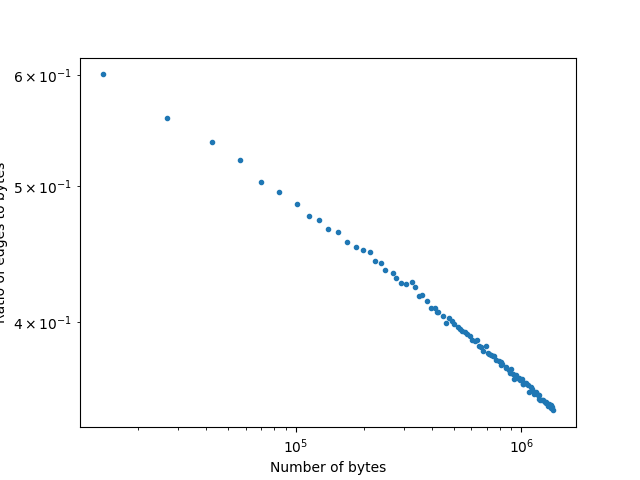

LinregressResult(slope=-0.14278924317558922, intercept=0.81861986893993022, rvalue=-0.99729864323940876, pvalue=8.1619889170799815e-112, stderr=0.0010678171012787974)


In [36]:
ratio_vs_bytes = plt.figure()
ratio_vs_bytes_ax = ratio_vs_bytes.add_subplot(111)
ratio_vs_bytes_ax.plot(num_bytes, np.divide(num_edges, num_bytes), '.')
ratio_vs_bytes_ax.set_xlabel('Number of bytes')
ratio_vs_bytes_ax.set_ylabel('Ratio of edges to bytes')
ratio_vs_bytes_ax.set_xscale('log')
ratio_vs_bytes_ax.set_yscale('log')
print(stats.linregress(np.log(num_edges), np.log(np.divide(num_edges, num_bytes))))

<IPython.core.display.Javascript object>


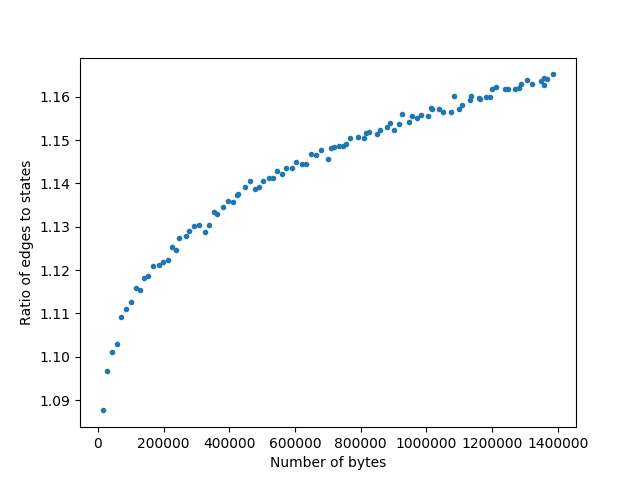

In [40]:
ratio_vs_bytes2 = plt.figure()
ratio_vs_bytes_ax2 = ratio_vs_bytes2.add_subplot(111)
ratio_vs_bytes_ax2.plot(num_bytes, np.divide(num_edges, num_states), '.')
ratio_vs_bytes_ax2.set_xlabel('Number of bytes')
ratio_vs_bytes_ax2.set_ylabel('Ratio of edges to states')
#ratio_vs_bytes_ax2.set_xscale('log')
#ratio_vs_bytes_ax2.set_yscale('log')
#print(stats.linregress(np.log(num_edges), np.log(np.divide(num_edges, num_bytes))))